<a href="https://colab.research.google.com/github/ginnaaleee/CPSC-439-Project-1/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import numpy as np

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train = X_train / 255
X_test = X_test / 255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

# Test our drawing numbers by hand on laptop

image1 = cv2.imread(f'number_x.png',0)
image1 = cv2.resize(image1, (28,28))

image2 = cv2.imread(f'number_y.png',0)
image2 = cv2.resize(image2, (28,28))

image3 = cv2.imread(f'number_z.png',0)
image3 = cv2.resize(image3, (28,28))

image4 = cv2.imread(f'number_a.png',0)
image4 = cv2.resize(image4, (28,28))

data=[]
data.append(np.asarray(image1)/255.0)
data.append(np.asarray(image2)/255.0)
data.append(np.asarray(image3)/255.0)
data.append(np.asarray(image4)/255.0)

data=np.array(data)
y_predicted = model.predict(data)
print('Prediction for these images: ', np.argmax(y_predicted[0]), np.argmax(y_predicted[1]), np.argmax(y_predicted[2]), np.argmax(y_predicted[3]))

#print(y_predicted)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8733 - loss: 0.4559
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9632 - loss: 0.1267
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9743 - loss: 0.0858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9792 - loss: 0.0678
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9855 - loss: 0.0511
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0389
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9915 - loss: 0.0294
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9919 - loss: 0.0258
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9940 - loss: 0.0206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9947 - loss: 0.0177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction for these images:  3 9 4 5


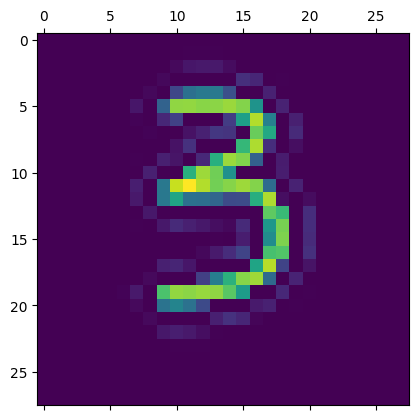

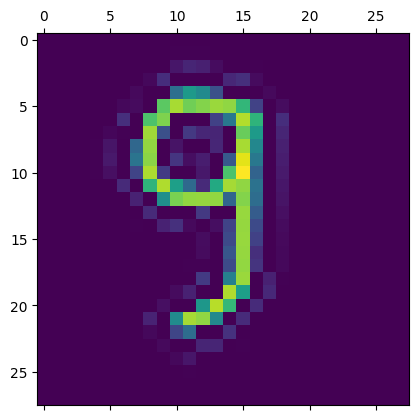

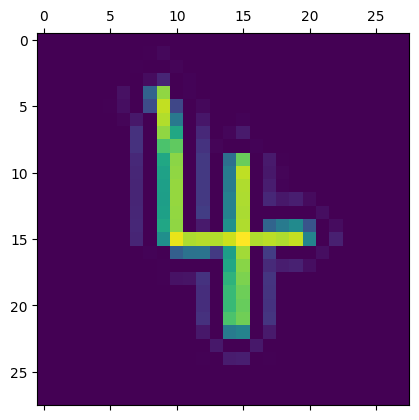

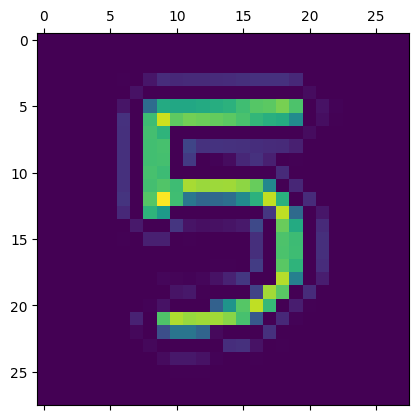

In [ ]:
plt.matshow(data[0])
plt.matshow(data[1])
plt.matshow(data[2])
plt.matshow(data[3])


<ipython-input-6-92483888809e>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(X_test[16])


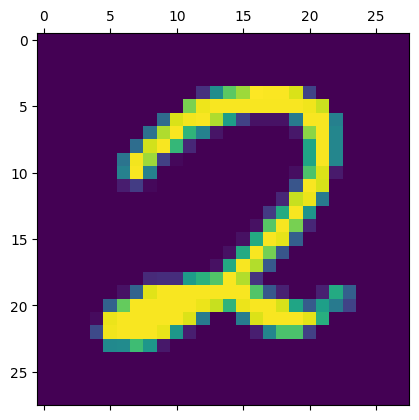

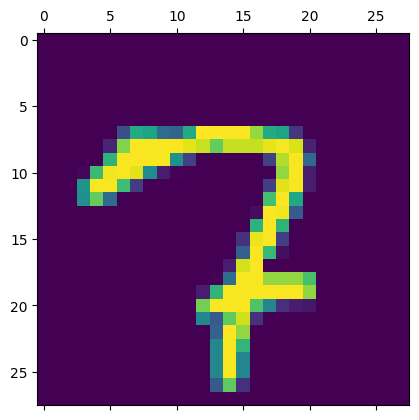

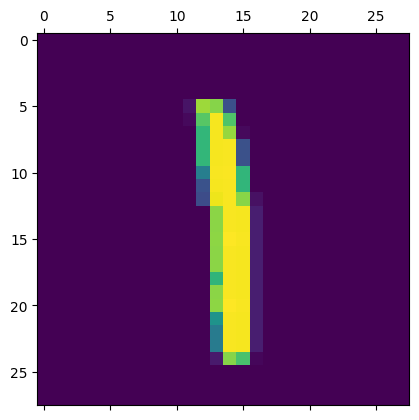

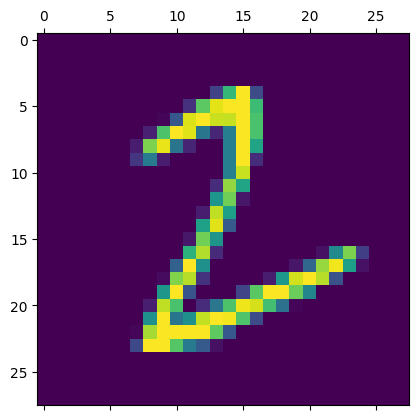

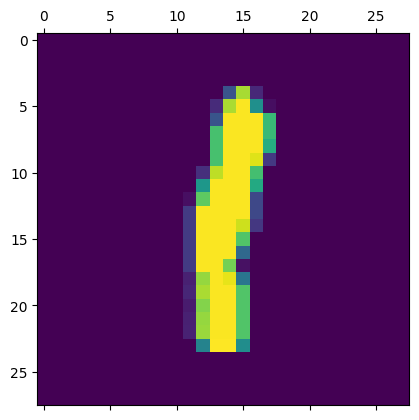

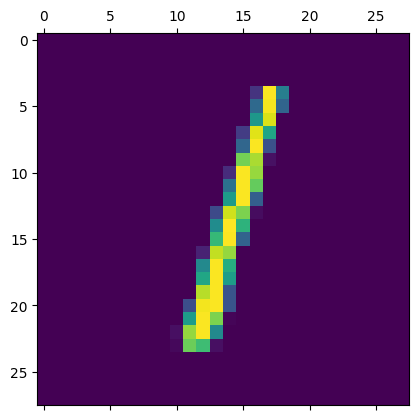

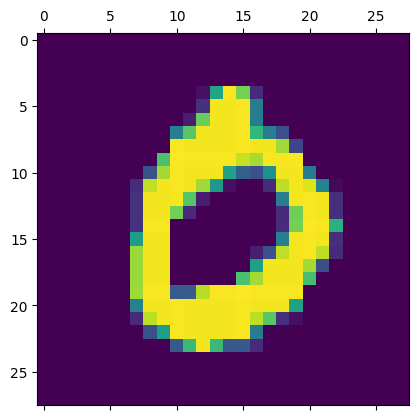

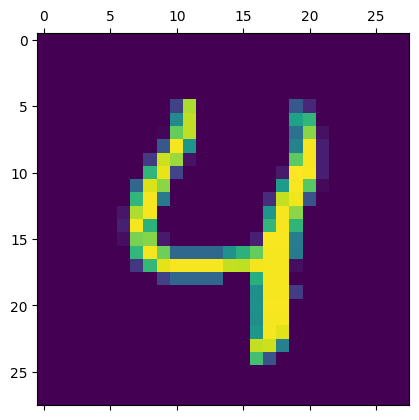

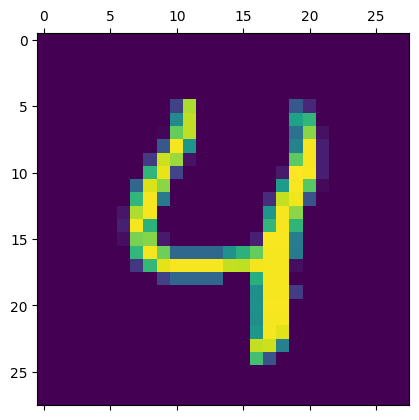

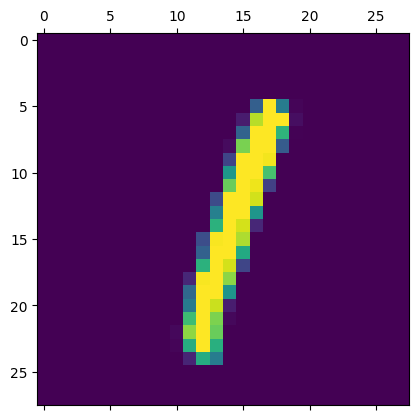

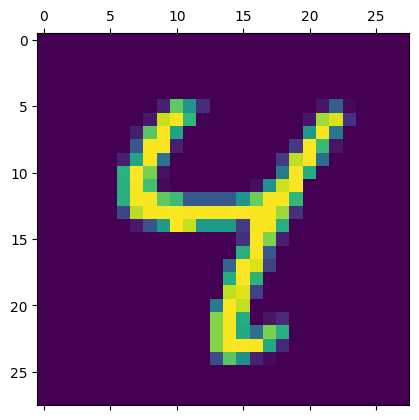

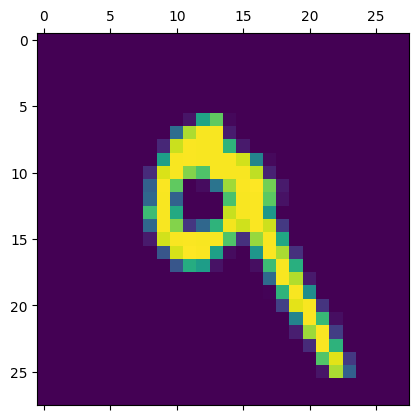

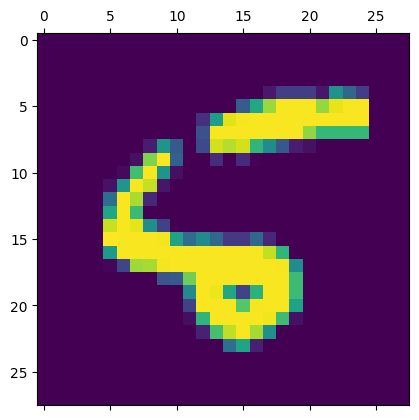

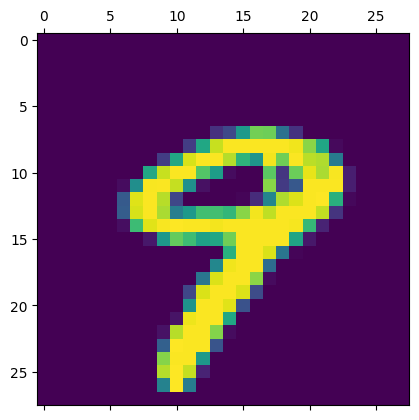

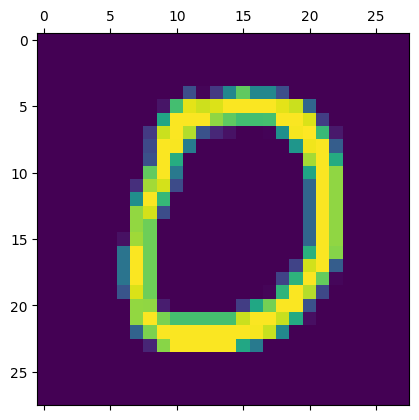

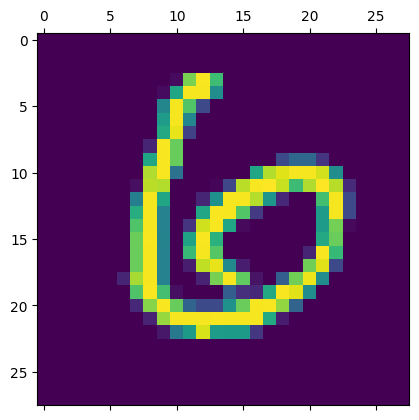

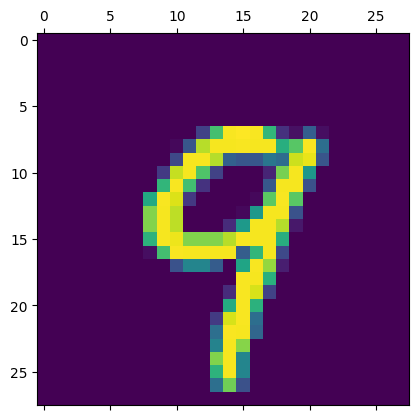

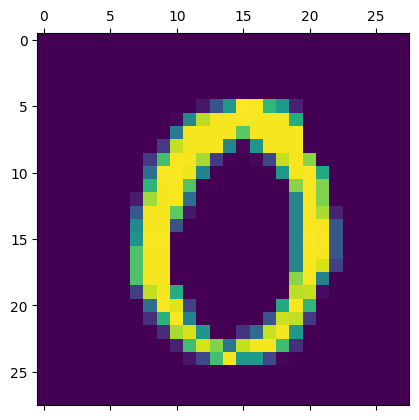

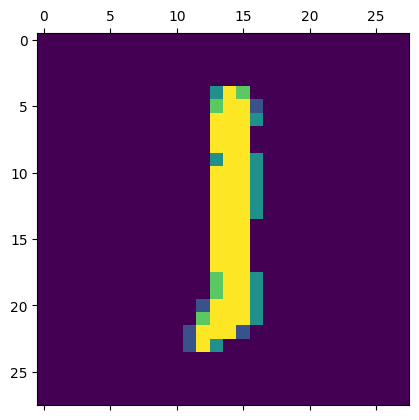

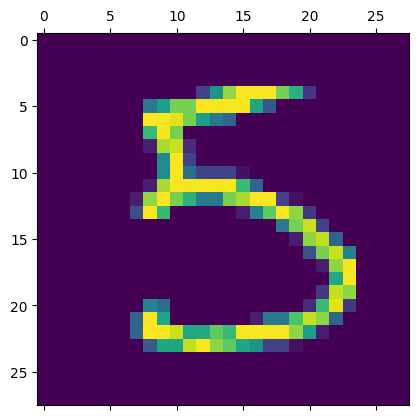

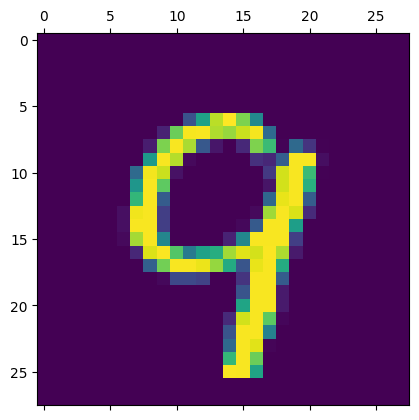

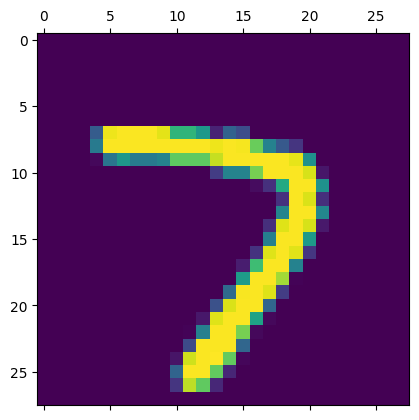

In [ ]:
plt.matshow(X_test[35])
plt.matshow(X_test[36])
plt.matshow(X_test[37])
plt.matshow(X_test[38])
plt.matshow(X_test[39])
plt.matshow(X_test[2])
plt.matshow(X_test[3])
plt.matshow(X_test[4])
plt.matshow(X_test[4])
plt.matshow(X_test[5])
plt.matshow(X_test[6])
plt.matshow(X_test[7])
plt.matshow(X_test[8])
plt.matshow(X_test[9])
plt.matshow(X_test[10])
plt.matshow(X_test[11])
plt.matshow(X_test[12])
plt.matshow(X_test[13])
plt.matshow(X_test[14])
plt.matshow(X_test[15])
plt.matshow(X_test[16])
plt.matshow(X_test[17])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


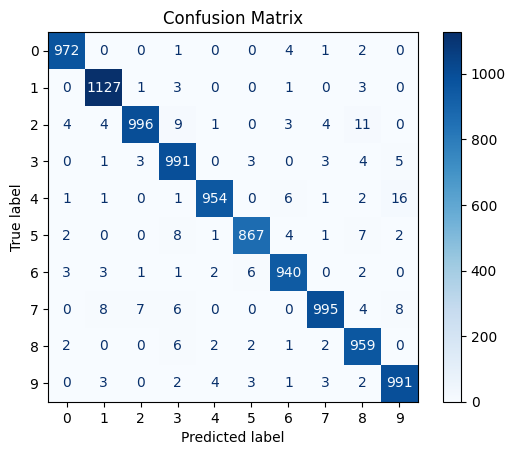

In [3]:
# Step 1: Predict on the test data
# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels (take the index of the maximum value)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

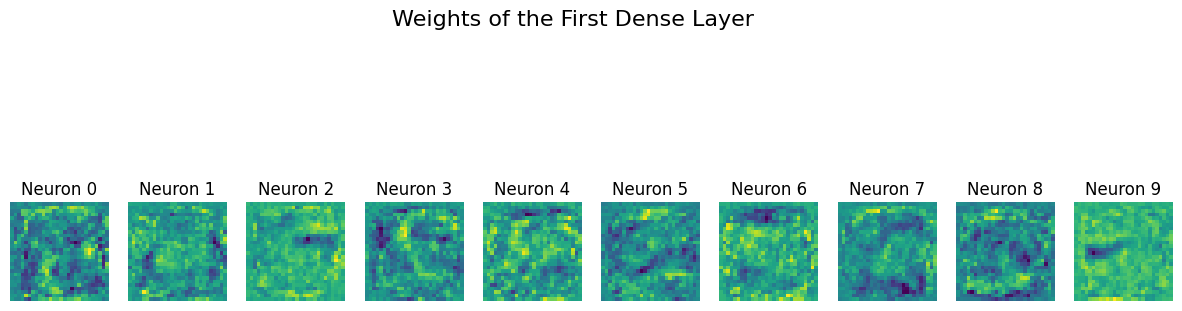

In [4]:
def visualize_weights(layer_index, num_neurons=10, title="Layer Weights"):
    # Get the weights and biases from the specified layer
    weights, biases = model.layers[layer_index].get_weights()

    # Select the first `num_neurons` weights to visualize
    num_features = weights.shape[0]

    fig, axes = plt.subplots(1, num_neurons, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes):
        if i < weights.shape[1]:  # Ensure we don't exceed the number of neurons
            # Extract weights corresponding to the i-th neuron
            neuron_weights = weights[:, i].reshape(28, 28)

            # Normalize weights for better visualization
            neuron_weights = (neuron_weights - np.min(neuron_weights)) / (np.max(neuron_weights) - np.min(neuron_weights))

            ax.imshow(neuron_weights, cmap='viridis')
            ax.axis('off')
            ax.set_title(f"Neuron {i}")
        else:
            ax.axis('off')
    plt.show()

# Visualize the weights of the first dense layer
visualize_weights(1, num_neurons=10, title="Weights of the First Dense Layer")